## Patent Recommendation System
## Implemented Proposal




- In this interactive notebook, we will be implementing recommendation systems that offer personalized recommendations based on text inputs provided by the user. These recommendation systems will leverage the powerful language model from OpenAI, Ada-002, to analyze the text data and generate relevant suggestions.


 - Recommendation systems: Using OpenAI, we build recommendation systems that provide personalized recommendations based on texts (word set, title, or abstract) provided by the user.

 # Data Acquisition



A dataset of Patents is required for the recommendation system.

This should include for each Patent the Title and Abstract information. Other data can also be included to provide more information to help the user identify the Patents based on the presented suggestions.

- Such as Patent Number, Publication Date, CPC Classifications, or any other content.


## Data Collection Methods and Sources

* A dataset containing patents published between the period of 2022 and 2023 was extracted from the Lens.org platform. With the following considerations:

- It includes titles and abstracts.
- Patents with an active legal status.
- CPC classification focused on machine learning and artificial intelligence (G06 or G05B).
- And the 15,000 most relevant patents from this set.

[Lens](http://www.lens.og) is a powerful platform that facilitates the collection of data for research purposes. The process of data collection through Lens.org involves several steps. Firstly, Lens.org provides access to a vast amount of patent data from various patent offices around the world. Researchers can search and retrieve patent documents, including full-text publications.

To collect data through Lens.org, researchers can use the platform's search functionality, which allows them to enter specific criteria such as keywords, inventors, assignees, or patent numbers. The search results provide a comprehensive list of relevant patents that match the specified criteria.

# Embeddings

This is a proof-of-concept project that will also utilize the OpenAI's embeddings endpoint to generate embeddings for the text data. After merging the patent publications, we will use the OpenAI endpoint to generate high-quality vector representations for each text data point, which can be used for further analysis or machine learning tasks

In [ ]:
# installs
!pip install tiktoken
!pip install openai
!pip install gdown
!pip install openTSNE

# imports
import pandas as pd
import tiktoken
from openai.embeddings_utils import get_embedding
import matplotlib.pyplot as plt
import gdown
import pandas as pd
import numpy as np
from openai.embeddings_utils import get_embedding, cosine_similarity
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
import openTSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.5 MB/s eta 0:00:00


## Uploading the Embeddings and Building a Recommendation System

In [ ]:
datafile_path = "Patentes.csv"
df = pd.read_csv(datafile_path)

# Convert a column of strings representing lists of numbers (the embeddings) into a column of NumPy arrays
df["embedding"] = df.embedding.apply(eval).apply(np.array)

In [ ]:
# search through a similar patente
def search_patentes(dataframe, patente_description, n=3, pprint=True):
    df = dataframe.copy()
    patente_embedding = get_embedding(patente_description,
                                    engine="text-embedding-ada-002"
                                    )
    df["similarity"] = df.embedding.apply(lambda x: cosine_similarity(x, patente_embedding))
    results = df.sort_values("similarity", ascending=False).head(n).combined.str.replace("Title: ", "").str.replace("; Abstract:", ": ")

    return results

In [ ]:
# Top 5 results of similar Patents

Patent = "Computer-Aided Medical Diagnostic System Based on Machine Learning"
result = search_patentes(df,Patent, 5, False)
result

4806     Computer implemented determination method and ...
14555    Computer aided diagnosis system for detecting ...
2932     Implementation of machine-learning based query...
13091    System and method for automated labeling and a...
3283     System and method for generating and editing d...
Name: combined, dtype: object

In [ ]:
# Displaying the complete 'Title' and 'Abstract'
for i in range(5):
    query = result.iloc[i]
    print(f'Title and Abstract {i+1} - {query}')

Title and Abstract 1 - Computer implemented determination method and system:  Methods for providing a computer implemented medical diagnosis are provided. In one aspect, a method includes receiving an input from a user comprising at least one symptom of the user, and providing the at least one symptom as an input to a medical model. The method also includes deriving estimates of the probability of the user having a disease from the discriminative model, inputting the estimates to the inference engine, performing approximate inference on the probabilistic graphical model to obtain a prediction of the probability that the user has that disease, and outputting the probability of the user having the disease for display by a display device.
Title and Abstract 2 - Computer aided diagnosis system for detecting tissue lesion on microscopy images based on multi-resolution feature fusion:  Embodiments of the present disclosure include a method, device and computer readable medium involving recei

In [ ]:
# Additional information of the similar patents.
df["combined2"] = (df.Title.fillna("").str.strip() +
    ":  " + df.Abstract.fillna("").str.strip()
)

print(f'{df["combined2"]}')

0        Contextualization of industrial data at the de...
1        Failure prediction using gradient-based sensor...
2        Gaming service automation system with graphica...
3        FAULT AWARE HYBRID NATURE INSPIRED ALGORITHM U...
4        Augmented exception prognosis and management i...
                               ...                        
14995    Model object management and storage system:  A...
14996    SYSTEM AND METHOD FOR MISSION CRITICAL SCREEN ...
14997    METHOD FOR GENERATING AUTOMATICALLY OF CERTIFI...
14998    Projecting images to a generative model based ...
14999    Method and system for tracking an object:  A m...
Name: combined2, Length: 15000, dtype: object


In [ ]:
query = result.tolist()  # Convert result to a list

# Create an empty DataFrame
res = pd.DataFrame(columns=['Application Number', 'Title', 'Abstract', 'Publication Date'])

# Search and append matching records to the DataFrame
for q in query:
    matching_records = df[df['combined2'] == q][['Application Number', 'Title', 'Abstract', 'Publication Date']]
    
    # Limit the length of the 'Abstract' column to 100 characters
    matching_records['Abstract'] = matching_records['Abstract'].str[:200]
    
    res = res.append(matching_records)

# Display the resulting table
display(res)



<ipython-input-106-8c08fb9073eb>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-106-8c08fb9073eb>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-106-8c08fb9073eb>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-106-8c08fb9073eb>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-106-8c08fb9073eb>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Application Number,Title,Abstract,Publication Date
4806,US 201916277970 A,Computer implemented determination method and ...,Methods for providing a computer implemented m...,2022-05-31
14555,US 201916670321 A,Computer aided diagnosis system for detecting ...,Embodiments of the present disclosure include ...,2022-05-24
2932,US 201916722747 A,Implementation of machine-learning based query...,"A computer system, computer-implemented method...",2022-09-20
13091,US 201816645240 A,System and method for automated labeling and a...,Supervised and unsupervised learning schemes m...,2023-03-28
3283,US 202017017657 A,System and method for generating and editing d...,Embodiments of the disclosure provide systems ...,2023-02-07


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Run

In [ ]:
datafile_path = "Patentes.csv"
df = pd.read_csv(datafile_path)

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(eval).to_list())

In [ ]:
# https://github.com/pavlin-policar/openTSNE

# Create a t-SNE model and transform the data into only two components
tsne_new = openTSNE.TSNE(n_components=2, perplexity=15, random_state=42,learning_rate=200)
vis_dims_new = tsne_new.fit(matrix)

In [ ]:
patente = "Computer-Aided Medical Diagnostic System Based on Machine Learning"

patente_embedding = get_embedding(patente,engine="text-embedding-ada-002")

In [ ]:
# Place this new embedding into all dataset
patente_embedding = np.array(patente_embedding)
patente_embedding = patente_embedding.reshape(1, -1)
two_dimensions = vis_dims_new.transform(patente_embedding)

Text(0.5, 1.0, 'Patents visualized in language using Open t-SNE')

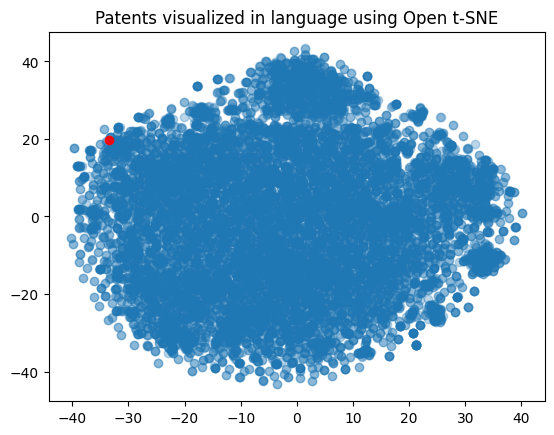

In [ ]:
x = [x for x,y in vis_dims_new]
y = [y for x,y in vis_dims_new]
plt.scatter(x, y, alpha=0.3)
plt.scatter(two_dimensions[0][0], two_dimensions[0][1], c='red',alpha=0.9)
plt.title("Patents visualized in language using Open t-SNE")

In [ ]:
import plotly.graph_objs as go

x = [x for x, y in vis_dims_new]
y = [y for x, y in vis_dims_new]


# Criar o gráfico de dispersão principal
scatter = go.Scatter(x=x, y=y, mode='markers', marker=dict(opacity=0.3),
                     text=df.Title, hoverinfo='text', name="Patents from the database")

# Adicionar o ponto azul
red_dot = go.Scatter(x=[two_dimensions[0][0]], y=[two_dimensions[0][1]], mode='markers',
                      marker=dict(color='red', opacity=0.9), text="Reference Patent",
                      hoverinfo='text', name="Reference Patent")

# Criar um layout para o gráfico
layout = go.Layout(title="Patents visualized in language using Open t-SNE")

# Combina os elementos do gráfico e exibe o resultado
fig = go.Figure(data=[scatter, red_dot], layout=layout)
fig.show()

In [ ]:
import plotly.graph_objs as go
import numpy as np

x = [x for x, y in vis_dims_new]
y = [y for x, y in vis_dims_new]

# Obter as duas primeiras strings de 'Application Number'
colors = [app_num[:2] for app_num in df['Juridction']]

# Mapear as cores fixas para cada categoria
color_mapping = {
    'US': 'rgb(31, 119, 180)', # azul
    'AU': 'rgb(255, 127, 14)', # Roxo
    'EP': 'rgb(44, 160, 44)', # Verde
    'JP': 'rgb(0, 0, 0)', # preto
    'CN': 'rgb(255, 255, 0)'  # Amarelo
}

# Definir uma cor padrão para valores não encontrados no mapeamento
default_color = 'rgb(128, 128, 128)'

# Mapear as cores para os valores fixos ou usar a cor padrão
fixed_colors = [color_mapping.get(color, default_color) for color in colors]

# Criar o gráfico de dispersão principal
scatter = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        opacity=0.3,
        color=fixed_colors,  # Usar cores fixas para cada categoria ou a cor padrão
    ),
    text=df.Title,
    hoverinfo='text',
    name=""
)

# Adicionar o ponto azul
red_dot = go.Scatter(
    x=[two_dimensions[0][0]],
    y=[two_dimensions[0][1]],
    mode='markers',
    marker=dict(color='red', opacity=0.9),
    text="Reference Patent",
    hoverinfo='text',
    name="Reference Patent"
)

# Criar um layout para o gráfico
layout = go.Layout(
    title= "Patents visualized in language using Open t-SNE",
    xaxis=dict(title=""),
    yaxis=dict(title=""),
    legend=dict(
        title="",
        #traceorder="normal",
        #bgcolor='rgba(255, 255, 255, 0.5)',
        #bordercolor='rgba(0, 0, 0, 0.5)',
        #borderwidth=1
    )
)
# Combina os elementos do gráfico e exibe o resultado
fig = go.Figure(data=[scatter, red_dot], layout=layout)
fig.show()